# Classificador cachorros vs gatos via Keras e Tensorflow

#### Thyago Capitanio

A proposta é criar um classificador a partir de uma rede neural e classificar entre gatos e cachorros. O banco de dados é oferecido pela microsoft em https://www.microsoft.com/en-us/downl...

O objetivo aqui foi justamente treinar a aplicação prática de como se criar uma rede neural do tipo e tentar entender a teoria e com ela fazer os comentários. Minha base teórica ainda é muito superficial e não saberia explicar muitas das decisões tomadas aí, principalmente quando se trata das camadas, mas esse tutorial me fez ter uma compreensão maior do que é o desafio de criar redes neurais e deep learning.

##### Passo 1: Imports

1. Numpy para manipulação de arrays
2. Matplotlib para plotar gráficos e imagens
3. Os para interação com o sistema operacional
4. Cv2 para manipulação de imagens 
5. Pickle para serializar os objetos
6. Time para criar nomes únicos para os modelos
7. Tensorflow e as camadas para de fato rodar os modelos

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

###### Passo 2: Importar a base de dados e normalizar as imagens

Estou normalizando as imagens para 50px x 50px, as convertendo para preto e branco (a hipótese é que a cor não vá influenciar muito no treinamento da rede) para reduzir o tamanho do problema (ao invés de lidar com 3 valores para r, g e b estou lidando com valores em escala de cinza) 

In [2]:
NAME = 'Cats-vs-dogs-cnn-64x2-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

In [3]:
IMG_SIZE = 50

DATADIR ="/Users/thyagocapitanio/Desktop/Python/Machine Learning Tutorials/Kaggle_cats_and_dogs/PetImages"
CATEGORIES = ['Dog','Cat']

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
    
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
        
        
create_training_data()

In [4]:
print(len(training_data)) #numero de elementos total
print(sum(elem[1] == 0 for elem in training_data)) #numero de cachorros
print(sum(elem[1] == 1 for elem in training_data)) #numero de gatos

24946
12470
12476


Ao comparar o número de elementos gato e cachorro na base de dados, é possível ver que os números são próximos, então não há necessidade de corrigir a base de dados com pesos.

É necessário embaralhar a base de dados para que a rede possa aprender melhor.

In [5]:
np.random.shuffle(training_data)

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Salvando os dados

In [7]:
pickle_out = open('X.pickle','wb')
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()

Reabrindo os dados

In [8]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

###### Passo 3: especificações do modelo, com 3 camadas

In [9]:
X = np.array(X/255.0)
y = np.array(y)

In [10]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [11]:
model.fit(X, y, batch_size = 32, epochs=3, validation_split = 0.1, callbacks = [tensorboard])

Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 176s 8ms/sample - loss: 0.6021 - accuracy: 0.6691 - val_loss: 0.5452 - val_accuracy: 0.7130
Epoch 2/3
22451/22451 [==============================] - 170s 8ms/sample - loss: 0.5010 - accuracy: 0.7574 - val_loss: 0.4908 - val_accuracy: 0.7647
Epoch 3/3
22451/22451 [==============================] - 171s 8ms/sample - loss: 0.4552 - accuracy: 0.7878 - val_loss: 0.4673 - val_accuracy: 0.7824


Imagem do TensorBoard

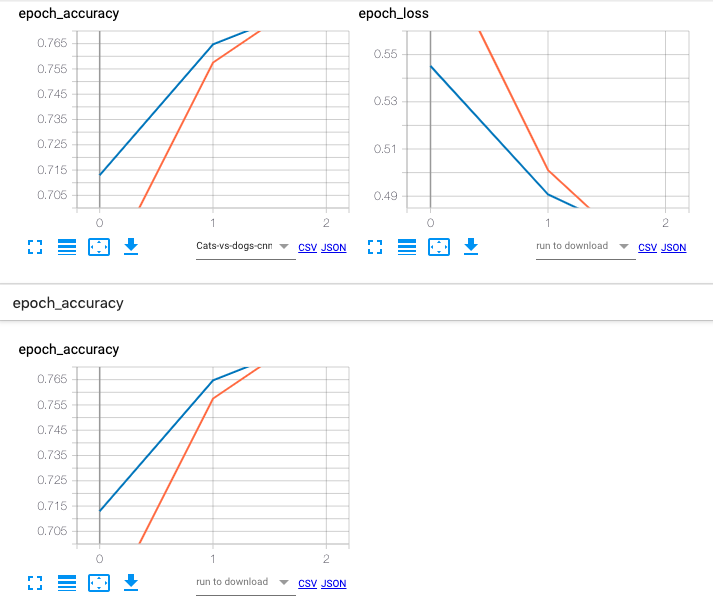